$$
\newcommand{proof}{\textbf{Proof: }}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from module import wave, signal, fourier
from module.utility import spectrum_line

# Fourier transform

Previously, we have shown how to obtain the discrete-frequency spectrum of any periodic signal, by computing its [Fourier series](./fourier_series.ipynb).


Now, we wish to extend this concept to non-periodic signals.

Recall that when we compute the Fourier series of a square wave, we found that the coefficients correspond to a $sinc$ function.

Now, suppose that we wish to perform similar analysis to a non-periodic $rect$ signal instead.

A way of adapting the Fourier series into non-periodic signal is to simply increase $T_p$.
As $T_p \to \infty$, we begin to approximate a non-periodic signal.

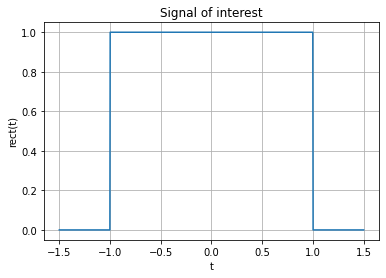

In [2]:
ts = np.linspace(-1.5, 1.5, 1000)
T = 2
plt.plot(ts, signal.rect(ts, T))
plt.xlabel("t")
plt.ylabel("rect(t)")
plt.title("Signal of interest")
plt.grid()
plt.show()

Given the above signal, we will now compute the Fourier coefficients while increasing $T_p$.

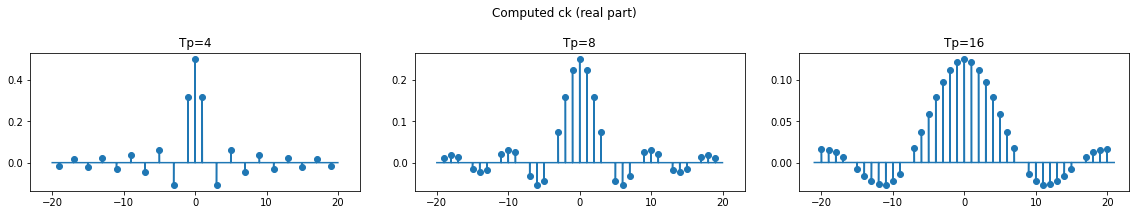

In [3]:
fig, axs = plt.subplots(1, 3, sharex=True, figsize=(16, 3))

for i, ax in enumerate(axs, start=1):
    Tp = 2**i * T
    c_range = np.arange(-20, 20 + 1)
    cs = fourier.series(lambda t: signal.rect(t, T), Tp, c_range).real
    indices = ~np.isclose(cs, 0, atol=1e-6)

    ax.scatter(c_range[indices], cs[indices])
    ax.plot(*spectrum_line(c_range[indices], cs[indices]))
    ax.set_title(f"Tp={Tp}")

fig.suptitle("Computed ck (real part)")
plt.tight_layout()
plt.show()

Notice that as we increase $T_p$, we are getting more points of frequency.
Also, it begins to approximate a $sinc$ function.

This is indeed the case when we take the limit of the coefficients as $T_p \to \infty$.

However, notice that the coefficients are approaching $0$.
Indeed, this is obvious if we look at the definition of the Fourier coefficients; the $\frac{1}{T_p}$ term is pulling the values to $0$.

$$
c_k = \frac{1}{T_p} \int_{t_0} ^{t_0 + T_p} e^{-j2\pi k \frac{t}{T_p}} x(t) dt 
$$

Despite this, it does seem rather useful to analyze the behaviour of the coefficients as we take the limit.
Thus, to sidestep the issue, we simply account for the $\frac{1}{T_p}$ term in our analysis.

$$
T_p c_k =  \int_{t_0} ^{t_0 + T_p} e^{-j2\pi k \frac{t}{T_p}} x(t) dt 
$$

Now, we observe the behaviour of the term $\frac{k}{T_p}$.

Since $k$ is an integer that ranges from $-\infty$ to $\infty$, as $T_p \to \infty$, $\frac{k}{T_p}$ becomes a real number from $-\infty$ to $\infty$.
This agrees with our graphs above, where $\frac{k}{T_p}$ represents the spacing between the frequencies, and as $T_p \to \infty$, the graph becomes continuous.
Hence, we can substitute it with a variable $f = \frac{k}{T_p}$.
Then we perform the following simplification.

$$
\begin{align}
\lim _{T_p \to \infty}\int_{t_0} ^{t_0 + T_p} e^{-j2\pi k \frac{t}{T_p}} x(t) dt 
&= \lim _{T_p \to \infty}\int_{-T_p/2} ^{T_p/2} e^{-j2\pi k \frac{t}{T_p}} x(t) dt \\
&= \lim _{T_p \to \infty}\int_{-T_p/2} ^{T_p/2} e^{-j2\pi ft} x(t) dt \\
&= \int_{-\infty} ^{\infty} e^{-j2\pi ft} x(t) dt \\
\end{align}
$$

Lastly, we label this function as $X(f)$, the (forward) **Fourier transform** of $x(t)$, known as $\mathcal{F} \left\{ x(t) \right\}$.

$$
X(f) = \int_{-\infty} ^{\infty} e^{-j2\pi ft} x(t) dt \\
$$

We can plug this definition back into our Fourier synthesis to obtain the inverse Fourier transform, $\mathcal{F}^{-1} \left\{ X(f) \right\}$.

$$
\begin{align}
x(t) &= \sum _{k=-\infty} ^{\infty} c_k e^{j2\pi \frac{k}{T_P}t}  \\
&=\lim _{T_p \to \infty}\sum _{k=-\infty} ^{\infty} \frac{1}{T_p} X(f) e^{j2\pi \frac{k}{T_P}t}  \\
&=\lim_{f_p \to 0}\sum _{k=-\infty} ^{\infty} f_p X(f) e^{j2\pi ft} \\
&=\int _{-\infty} ^{\infty}  X(f) e^{j2\pi f t} df \quad \text{Summation approaches the integral}
\end{align}
$$

Since $\mathcal F ^{-1} \left\{ \mathcal F (x(t)) \right\} = x(t)$, we denote $x(t)$ and $X(f)$ as a pair:
$$
x(t) \leftrightharpoons X(f)
$$

Going back to our initial motivation of the $rect$ signal, 
suppose our signal is the form of $x(t) = A \cdot rect(\frac{t}{T})$. 
Then the Fourier transform would be

$$
\begin{align}
X(f) &= \int_{-\infty} ^{\infty} e^{-j2\pi ft} x(t) dt \\
&= \int_{-T/2} ^{T/2} A e^{-j2\pi ft}  dt \\
&= A \int_{-T/2} ^{T/2} \frac{e^{-j2\pi ft}}{-j2\pi f}  dt \\
&= A \frac{e^{-j\pi f T} - e^{j\pi f T}}{-j2\pi f} \\
&= AT sinc(fT) \\
\end{align}
$$

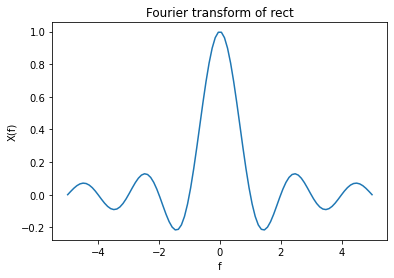

In [4]:
fs = np.linspace(-5, 5, 100)
plt.plot(fs, fourier.transform(lambda t: signal.rect(t, 1), fs))
plt.title("Fourier transform of rect")
plt.xlabel("f")
plt.ylabel("X(f)")
plt.show()

## Dirichlet's conditions

For the Fourier transform to exists, the following conditions must be met:
* $x(t)$ is single-valued for any finite time interval
* $x(t)$ has a finite number of maxima/minima in any finite time interval
* $x(t)$ has a finite number of discontinuities in any finite time interval
* $x(t)$ has to be absolutely integrable, _ie_ is an energy signal

The first 3 conditions are usually true for signals that we are analyzing.

The last condition seem to exclude power signals (_eg_ periodic signals), however, we will see later that we can extend the transform to them as well.

## Fourier transforms of common signals

### Rect



We had shown the the Fourier transform of a $rect$ function is the $sinc$ function.

Hence, we have
$$
\mathcal{F} \left\{ A \cdot rect \left( \frac{t}{T}\right) \right\} =  AT \cdot sinc (fT)
$$

### Sinc

Now we look at the Fourier transform of a $sinc$ function.

/home/own3d/wellspring/signal_processing/module/fourier.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ck_rs = [quad(lambda t: (func(t) * np.exp(-2j * np.pi * f * t)


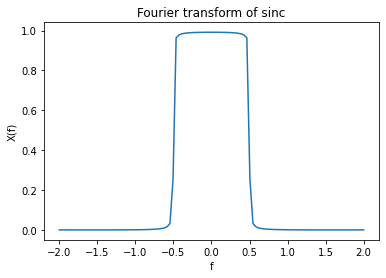

In [5]:
fs = np.linspace(-2, 2, 100)
plt.plot(fs, fourier.transform(lambda t: signal.sinc(t, 1), fs, Tp=50))
plt.title("Fourier transform of sinc")
plt.xlabel("f")
plt.ylabel("X(f)")
plt.show()

Conveniently, it correspond to a $rect$ function.

Hence, we assert the following:

$$
\mathcal{F} \left\{ A \cdot sinc \left(\frac{t}{T}\right) \right\} = AT \cdot rect \left(fT \right)
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
We have proven that Fourier transform of $rect$ previously.
Finding the forward Fourier transform of $sinc$ is a bit involved.
Instead, we compute the Fourier inverse of $rect$ and prove that it is indeed the Fourier transform of $sinc$.
$$
\begin{align}
\int ^ {\infty} _{-\infty} A \cdot rect(fT) e^{j2 \pi ft} df &= A\int ^ {\frac{1}{2T}} _{-\frac{1}{2T}} e^{j2 \pi ft} df \\ 
&= A \left[\frac{e^{j2 \pi ft}}{j2 \pi t} \right] ^ {\frac{1}{2T}} _{-\frac{1}{2T}} \\ 
&=A\frac{e^{j2 \pi \frac{t}{2T}} - e^{-j2 \pi \frac{t}{2T}}}{j2 \pi t} \\
&=A\frac{2j \sin(j2 \pi \frac{t}{2T})}{j2 \pi t} \\
&=A\frac{\sin(\pi \frac{t}{T})}{\pi t} \\
&= \frac{A}{T} sinc \left(\frac{t}{T}\right) \\
\therefore \mathcal{F} ^{-1} \left\{A \cdot rect(fT) \right\} &= \frac{A}{T} sinc \left( \frac{t}{T} \right) \\
\mathcal{F}  \left\{A sinc \left( \frac{t}{T} \right)\right\} &= AT rect(fT) \\
QED
\end{align}
$$
    </div>
</details>

### Tri

The Fourier transform of $tri$ is shown below:

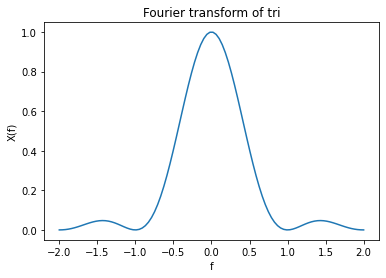

In [6]:
fs = np.linspace(-2, 2, 100)
plt.plot(fs, fourier.transform(lambda t: signal.tri(t, 1), fs))
plt.title("Fourier transform of tri")
plt.xlabel("f")
plt.ylabel("X(f)")
plt.show()

Astute readers would notice that this seems rather similar to the $sinc$ function, in fact this is $sinc^2$.

We assert the following:
$$
\mathcal{F} \left\{ A \cdot tri \left( \frac{t}{T}\right) \right\} = AT \cdot sinc ^2 (fT)
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
$$
\begin{align}
X(f) &= \int_{-\infty} ^{\infty} e^{-j2\pi ft} x(t) dt \\
&= A\left( \int_{-T} ^{0} (1 + \frac{t}{T}) e^{-j2\pi ft}  dt + \int_{0} ^{T} (1 - \frac{t}{T}) e^{-j2\pi ft}  dt \right) \\
&= A\left( \int_{-T} ^{T} e^{-j2\pi ft} dt + \int_{-T} ^{0} \frac{t}{T} e^{-j2\pi ft}  dt - \int_{0} ^{T}\frac{t}{T} e^{-j2\pi ft}  dt \right) \\
&= \frac{A}{T}\left( \frac{2Tj \sin (-2\pi fT)}{-j2\pi f} + \left[ \frac{\left(t - \frac{1}{-j2 \pi f}\right) e^{-j2\pi ft}}{-j2 \pi f} \right]_{-T} ^0 - \left[ \frac{\left(t - \frac{1}{-j2 \pi f}\right) e^{-j2\pi ft}}{-j2 \pi f} \right]_{0} ^T \right)\\ 
&= \frac{A}{T}\left(\frac{2Tj \sin (-2\pi fT)}{-j2\pi f} +  \left[ \frac{\frac{1}{j2 \pi f} - \left(-T - \frac{1}{-j2 \pi f}\right) e^{-j2\pi f (-T)}}{-j2 \pi f} \right] - \left[ \frac{\left(T - \frac{1}{-j2 \pi f}\right) e^{-j2\pi fT} - \frac{1}{j2 \pi f}}{-j2 \pi f} \right] \right)\\ 
&= \frac{A}{T}\left(\frac{2Tj \sin (-2\pi fT)}{-j2\pi f} + \left[ \frac{\frac{1}{j \pi f} + \left(T 2 j\sin(2 \pi f T) + \frac{1}{-j2 \pi f} 2 \cos(2 \pi fT) \right) }{-j2 \pi f} \right] \right)\\ 
&= \frac{A}{T}\left( \frac{\frac{1}{j \pi f} + \frac{1}{-j2 \pi f} 2 \cos(2 \pi fT)  }{-j2 \pi f}  \right)\\ 
&= \frac{A}{2T}\left( \frac{ 1 - \cos(2 \pi fT)}{\pi^2 f^2}  \right)\\ 
&= \frac{A}{2T}\left( \frac{2 \sin^2 (\pi f T)}{\pi^2 f^2}  \right)\\ 
&= AT sinc^2 (fT) \\
& QED
\end{align}
$$
    </div>
</details>

For completeness, the Fourier transform of $sinc^2$ is below:

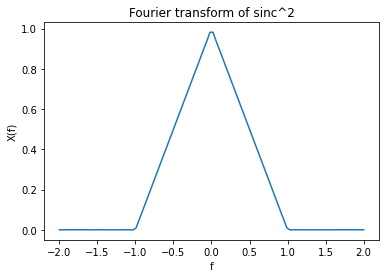

In [7]:
fs = np.linspace(-2, 2, 100)
plt.plot(fs, fourier.transform(lambda t: signal.sinc(t, 1) ** 2, fs, Tp=30))
plt.title("Fourier transform of sinc^2")
plt.xlabel("f")
plt.ylabel("X(f)")
plt.show()

We assert the following:
$$
\mathcal{F} \left\{ A \cdot sinc ^2 \left( \frac{t}{T}\right) \right\} = AT \cdot tri (fT)
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
$$
\begin{align}
\int ^ {\infty} _{-\infty} A \cdot tri(fT) e^{j2 \pi ft} df &= A\left(\int ^ {0} _{-\frac{1}{T}} (1 + fT) e^{j2 \pi ft} df + \int ^ {\frac{1}{T}} _{0} (1 - fT) e^{j2 \pi ft} df \right) \\
&= A\left(\int ^ {\frac{1}{T}} _{-\frac{1}{T}} e^{j2 \pi ft} df + \int _ {-\frac{1}{T}} ^{0} fT e^{j2 \pi ft} df  - \int ^ {\frac{1}{T}} _{0} fT e^{j2 \pi ft} df \right) \\
&= A\left(\frac{ e^{j2 \pi \frac{t}{T}} - e^{-j2 \pi \frac{t}{T}}}{j2 \pi t} +T \left[  \frac{(f - \frac{1}{j2 \pi t}) e^{j2 \pi ft}}{j2 \pi t} \right]_ {-\frac{1}{T}} ^{0} - T \left[ \frac{(f - \frac{1}{j2 \pi t}) e^{j2 \pi ft}}{j2 \pi t}\right]^ {\frac{1}{T}} _{0}  \right) \\
&= A\left(\frac{ e^{j2 \pi \frac{t}{T}} - e^{-j2 \pi \frac{t}{T}}}{j2 \pi t} +T \left[\frac{-\frac{1}{2j \pi t }- (-\frac{1}{T} - \frac{1}{j2 \pi t}) e^{-j2 \pi \frac{t}{T}}}{j2 \pi t} \right] - T \left[ \frac{(\frac{1}{T} - \frac{1}{j2 \pi t}) e^{j2 \pi \frac{t}{T}} + \frac{1}{j2 \pi t}}{j2 \pi t}\right] \right) \\
&= AT\left( \frac{-\frac{1}{j \pi t }+ \frac{1}{j2 \pi t} e^{-j2 \pi \frac{t}{T}} +\frac{1}{j2 \pi t} e^{j2 \pi \frac{t}{T}}  }{j2 \pi t}\right) \\
&= AT\left(\frac{-1  + \frac{1}{2} \left(e^{-j2 \pi \frac{t}{T}} + e^{j2 \pi \frac{t}{T}} \right)  }{-2 \pi^2 t^2}\right) \\
&= AT\left(\frac{-1  + \cos \left(2 \pi \frac{t}{T} \right)  }{-2 \pi^2 t^2}\right) \\
&= \frac{A}{T} sinc^2 \left(\frac{t}{T} \right) \\
\mathcal{F} \left\{ A \cdot sinc ^2 \left( \frac{t}{T}\right) \right\} &= AT \cdot tri (fT)\\
& QED
\end{align}
$$
    </div>
</details>

### Dirac delta


$$
\mathcal{F} \left\{\delta(t - A) \right\} = e^{-j2\pi fA}
$$

As a corollary:

$$
\mathcal{F} \left\{\delta(t) \right\} = 1
$$

### Sinusoids



$$
\mathcal{F} \left\{e^{j 2 \pi A t} \right\} = \delta(f - A)
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
$$
\begin{align}
&\text{We can derive the below from the Dirac delta Fourier transform:}\\
&\mathcal{F} ^{-1} \left\{ e^{-j 2 \pi At} \right\} = \delta(t - A) = \int ^\infty _{-\infty} e^{-j 2 \pi fA} e^{j 2 \pi ft} df \\
&\text{Swapping the labels of the variables $t$ and $f$, we get:}\\
&\delta(f - A) = \int ^\infty _{-\infty} e^{-j 2 \pi At} e^{j 2 \pi ft} dt \\
&\text{Subbing $f' = -f, A' = -A$, we get}\\
&\delta(-f' + A') = \int ^\infty _{-\infty} e^{j 2 \pi A't} e^{-j 2 \pi f't} dt \\
&\mathcal{F} \left\{ e^{j2 \pi At} \right\} = \int ^ {\infty} _{-\infty} e^{j 2 \pi At} e^{-j2 \pi ft} dt  = \delta(-f + A) = \delta(f -A) \\
& QED
 \end{align}
$$
    </div>
</details>

We initially said that sinusoids (because they are not energy signals) does not satisfy the conditions to have a Fourier transform.
However, if we allow for Dirac delta functions, we can actually use them to obtain the Fourier transform.

From this, we can easily find the Fourier transforms of sine and cosine functions:

$$
\mathcal{F} \left\{\cos{2 \pi A t} \right\} = \frac{1}{2} \left( \delta(f - A) + \delta(f + A) \right)\\
\mathcal{F} \left\{\sin{2 \pi A t} \right\} = \frac{1}{j2} \left( \delta(f - A) - \delta(f + A) \right)
$$

#### DC signal

DC signal is of the form $x(t) = K$.
We can represent this as sinusoid with amplitude of $K$ and $0$ frequency, thus we get:
$$
\mathcal F \left\{ K \right\} = K \delta(f)
$$

### Exponential (one sided)

$$
\mathcal F \left\{ A e^{-\alpha t} u(t)\right\} =  \frac{A}{\alpha + j 2 \pi f}
$$

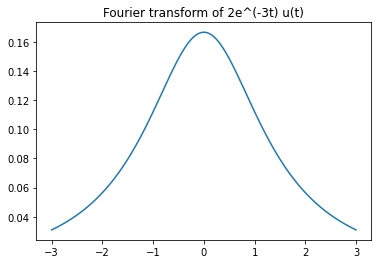

In [8]:
A, alpha = 2, 3
ts = np.linspace(-3, 3, 200)
fs = np.linspace(-2, 2, 200)


def x(t):
    return signal.exp(alpha * t, A) * signal.unit_step(t)


plt.plot(ts, fourier.transform(x, fs, Tp=20).real)
plt.title("Fourier transform of 2e^(-3t) u(t)")
plt.show()

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
$$
\begin{align}
X(f) &= \int_{-\infty} ^{\infty} e^{-j2\pi ft} x(t) dt \\
&= \int_{0} ^{\infty} A e ^{-\alpha t} e^{-j2\pi ft}  dt \\
&= A \int_{0} ^{\infty} e^{-(\alpha + j2\pi f)t}  dt \\
&= A  \left[ \frac{e^{-(\alpha + j2\pi f)t}}{-(\alpha + j2 \pi f)}  \right] _{0} ^{\infty}\\
&= A  \left[ \frac{0 - 1}{-(\alpha + j2 \pi f) }\right] \\ 
&= \frac{A}{-(\alpha + j2 \pi f)} \\ 
& QED
\end{align}
$$
    </div>
</details>

## Derivations using properties of Fourier transform



The following transforms are derived using [properties of Fourier transform](#Properties-of-Fourier-transform).

### Unit step

$$
\mathcal F \left\{ u(t)\right\} =  \frac{1}{j2\pi f} + \frac{1}{2} \delta(f)
$$

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
<div style="background: aliceblue">
Since $u(t) = \int ^t _{-\infty} \delta(\tau) d\tau$, using the integration property of Fourier transform, we get
$$
\begin{align}
\mathcal F \left\{ u(t) \right\} &= \frac{1}{j2\pi f} \mathcal F \left\{ \delta(t) \right\} + \frac{1}{2} \mathcal F \left\{ \delta(t) \right\} (0) \delta(f) \\
&= \frac{1}{j2\pi f} e^0 + \frac{1}{2} e^0 \delta(f) \\
&= \frac{1}{j2\pi f} + \frac{1}{2} \delta(f) \\
&QED
\end{align}
$$
</div>
</details>

### Signum

$$
\mathcal F \left\{ sgn(t)\right\} =  \frac{1}{j\pi f}
$$

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
<div style="background: aliceblue">
Since $sgn(t) = 2 u(t) - 1$, using the linear property of Fourier transform, we get
$$
\begin{align}
\mathcal F \left\{ sgn(t) \right\} &= 2 \mathcal F \left\{ u(t) \right\} - \mathcal F \left\{ 1 \right \}\\
&= 2\left( \frac{1}{j 2 \pi f} + \frac{1}{2} \delta(f)\right) - \mathcal F \left\{ e^0 \right \}\\
&= 2\left( \frac{1}{j 2 \pi f} + \frac{1}{2} \delta(f)\right) - \delta(f)\\
&= \frac{1}{j\pi f} \\
&QED
\end{align}
$$
</div>
</details>

## Properties of Fourier transform

### Duality

In our examples, you may have noticed that many times, $X(t) \leftrightharpoons x(f)$.

For example, we discovered to following:

$$
A \cdot rect \left( \frac{t}{T}\right) \leftrightharpoons  AT \cdot sinc (fT)
$$

$$
 A \cdot sinc \left(\frac{t}{T}\right) \leftrightharpoons AT \cdot rect \left(fT \right)
$$

We could have started from the first equation and (illegally) swapped the $f$ and $t$ variables to get the following:

$$
A \cdot rect \left( \frac{t}{T}\right) \leftrightharpoons  AT \cdot sinc (fT) \\
A \cdot rect \left( \frac{f}{T}\right) \leftrightharpoons  AT \cdot sinc (tT) \\
A \cdot rect ( fT' ) \leftrightharpoons  \frac{A}{T'} \cdot sinc \left(\frac{t}{T'} \right)\quad T' = \frac{1}{T} \\
AT \cdot rect ( fT' ) \leftrightharpoons  A\cdot sinc \left(\frac{t}{T'} \right) \\
$$

which is the same as what we've derived.
This is also observed with $tri$ with $sinc^2$.
It may seem coincidental, but it is actually due to the duality of Fourier transform.
Formally, it is defined as:
$$
X(t) \leftrightharpoons x(-f)
$$

Notice the $-f$ term instead of $f$.
It happened to work for our functions because **they are even**.

In [9]:
def make_axs(rows: int, cols: int):
    fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))

    for i in range(1, cols):
        for ax_rows in axs:
            ax_rows[i].sharex(axs[0][i])
            ax_rows[i].sharey(axs[0][i])

    axs[-1][0].set_xlabel("t")

    for a in axs[-1][1:]:
        a.set_xlabel("t")

    plt.tight_layout()
    return axs

/home/own3d/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/own3d/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/own3d/wellspring/signal_processing/module/fourier.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ck_rs = [quad(lambda t: (func(t) * np.exp(-2j * np.pi * f * t)


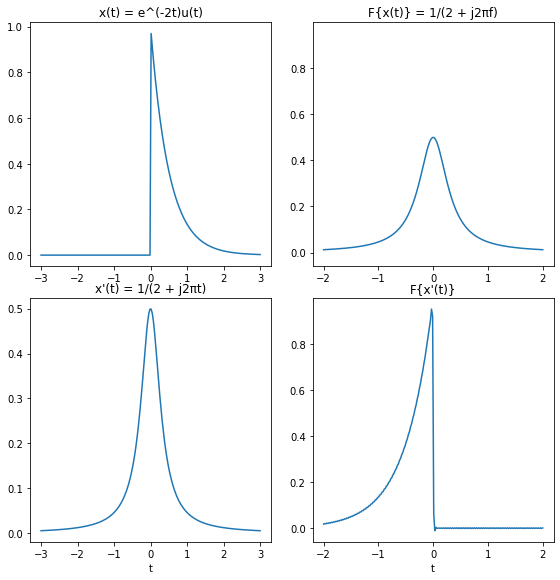

In [10]:
axs = make_axs(2, 2)

A = 2
T = 3
ts = np.linspace(-3, 3, 200)
fs = np.linspace(-2, 2, 200)


def x(t):
    return signal.exp(t, A) * signal.unit_step(t)


def x_p(t):
    return 1 / (A + 2j * np.pi * t)


axs[0][0].plot(ts, x(ts))
axs[0][0].set_title(f"x(t) = e^(-2t)u(t)")

axs[1][0].plot(ts, x_p(ts))
axs[1][0].set_title(f"x'(t) = 1/(2 + j2πt)")

axs[0][1].plot(fs, fourier.transform(x, fs, Tp=50))
axs[0][1].set_title("F{x(t)} = 1/(2 + j2πf)")

axs[1][1].plot(fs, fourier.transform(x_p, fs, Tp=50))
axs[1][1].set_title("F{x'(t)}")

plt.show()

Indeed, notice that the corresponding Fourier transform is actually flipped along the $f$ axis.

### Linearity

$$
ax_1(t) + bx_2(t) \leftrightharpoons a X_1(f) + bX_2(f)
$$

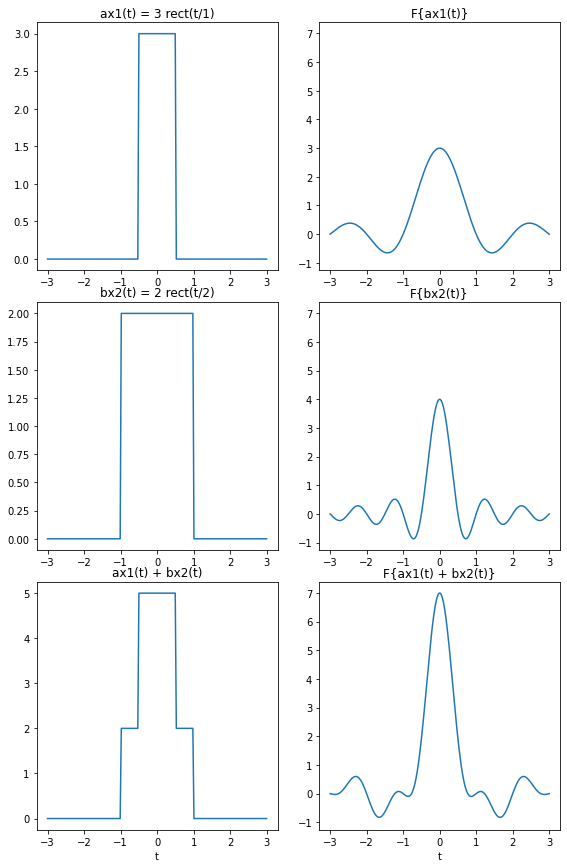

In [11]:
axs = make_axs(3, 2)

ts = np.linspace(-3, 3, 200)
fs = np.linspace(-3, 3, 200)
a, b = 3, 2
x1 = signal.rect(ts, 1)
x2 = signal.rect(ts, 2)

axs[0][0].plot(ts, a * x1)
axs[0][0].set_title(f"ax1(t) = {a} rect(t/1)")

axs[1][0].plot(ts, b * x2)
axs[1][0].set_title(f"bx2(t) = {b} rect(t/2)")

axs[2][0].plot(ts, a * x1 + b * x2)
axs[2][0].set_title(f"ax1(t) + bx2(t)")

axs[0][1].plot(fs, fourier.transform(lambda t: a * signal.rect(t, 1), fs))
axs[0][1].set_title("F{ax1(t)}")

axs[1][1].plot(fs, fourier.transform(lambda t: b * signal.rect(t, 2), fs))
axs[1][1].set_title("F{bx2(t)}")

axs[2][1].plot(
    fs, fourier.transform(lambda t: a * signal.rect(t, 1) + b * signal.rect(t, 2), fs)
)
axs[2][1].set_title("F{ax1(t) + bx2(t)}")
plt.show()

To see this, notice that the resultant Fourier transform is $\mathcal F \left\{ bx_2(t) \right \}$, but with the regions of $|f| \leq 1$ and $2 \leq |f| \leq 3$ shifted up, while the region of $1 \leq |f| \leq 2$ is shifted down, as per the Fourier transform of $ax_1(t)$.

### Time scaling
$$
x(At) \leftrightharpoons \frac{1}{A} X\left(\frac{f}{A}\right)
$$

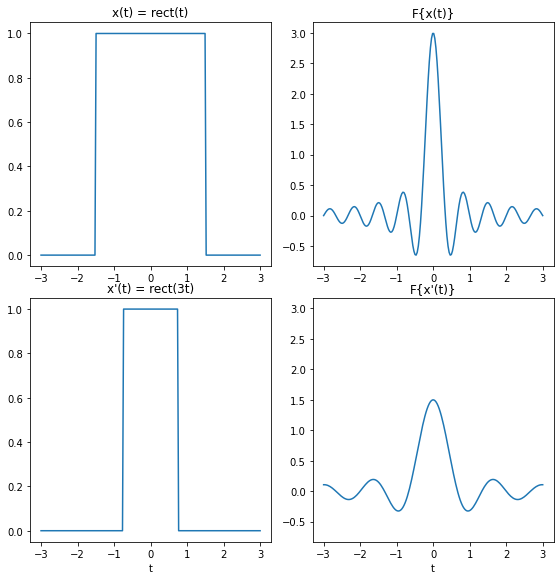

In [12]:
axs = make_axs(2, 2)

A = 2
T = 3
ts = np.linspace(-3, 3, 200)
fs = np.linspace(-3, 3, 200)


def x(t):
    return signal.rect(t, T)


def x_p(t):
    return signal.rect(t * A, T)


axs[0][0].plot(ts, x(ts))
axs[0][0].set_title(f"x(t) = rect(t)")

axs[1][0].plot(ts, x_p(ts))
axs[1][0].set_title(f"x'(t) = rect(3t)")

axs[0][1].plot(fs, fourier.transform(x, fs))
axs[0][1].set_title("F{x(t)}")

axs[1][1].plot(fs, fourier.transform(x_p, fs))
axs[1][1].set_title("F{x'(t)}")

plt.show()

### Time shifting

$$
x(t-t_0) \leftrightharpoons  X(f)e^{-j2\pi f t_0}
$$

/home/own3d/wellspring/signal_processing/module/fourier.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  ck_rs = [quad(lambda t: (func(t) * np.exp(-2j * np.pi * f * t)


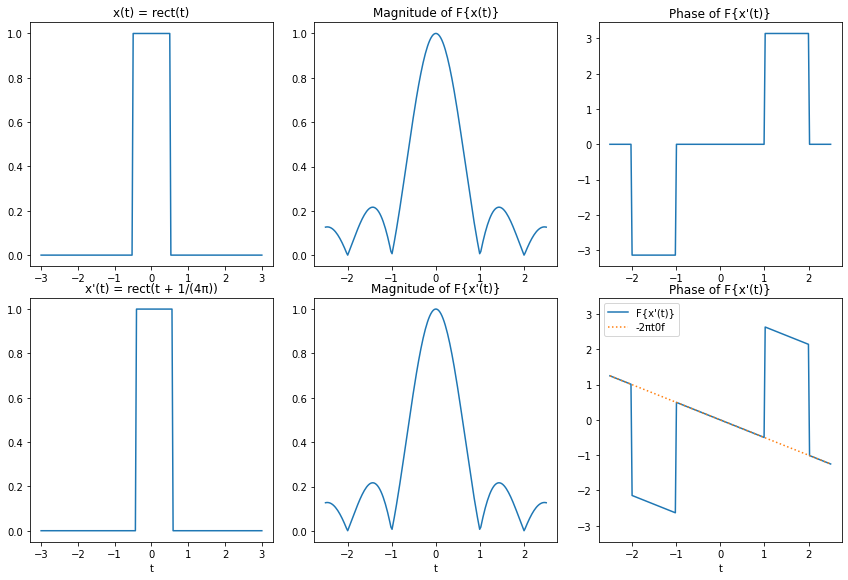

In [13]:
axs = make_axs(2, 3)

t0 = 1 / (4 * np.pi)
T = 1
ts = np.linspace(-3, 3, 200)
fs = np.linspace(-2.5, 2.5, 200)


def x(t):
    return signal.rect(t, T)


def x_p(t):
    return signal.rect(t - t0, T)


axs[0][0].plot(ts, x(ts))
axs[0][0].set_title(f"x(t) = rect(t)")

axs[1][0].plot(ts, x_p(ts))
axs[1][0].set_title(f"x'(t) = rect(t + 1/(4π))")

f_x = fourier.transform(x, fs)
f_xp = fourier.transform(x_p, fs)
axs[0][1].plot(fs, np.abs(f_x))
axs[0][1].set_title("Magnitude of F{x(t)}")

axs[1][1].plot(fs, np.abs(f_xp))
axs[1][1].set_title("Magnitude of F{x'(t)}")

axs[0][2].plot(fs, np.angle(f_x) * np.sign(fs))
axs[0][2].set_title("Phase of F{x'(t)}")

axs[1][2].plot(fs, np.angle(f_xp), label="F{x'(t)}")
axs[1][2].plot(fs, -2 * np.pi * t0 * fs, ":", label="-2πt0f")
axs[1][2].set_title("Phase of F{x'(t)}")
axs[1][2].legend()
plt.show()

Since the added exponential has a magnitude of $1$, this is equivalent to shifting the phase plot by $-2\pi t_0f$.

### Frequency shifting (Modulation)
$$
x(t)e^{j2\pi f_0 t} \leftrightharpoons  X(f - f_0)
$$

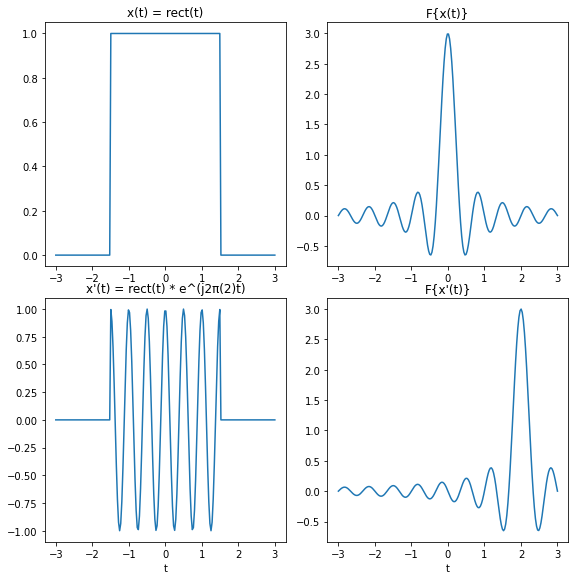

In [14]:
axs = make_axs(2, 2)

f0 = 2
T = 3
ts = np.linspace(-3, 3, 200)
fs = np.linspace(-3, 3, 200)


def x(t):
    return signal.rect(t, T)


def x_p(t):
    return signal.rect(t, T) * signal.sinusoid(t, f=f0)


axs[0][0].plot(ts, x(ts))
axs[0][0].set_title(f"x(t) = rect(t)")

axs[1][0].plot(ts, x_p(ts).real)
axs[1][0].set_title(f"x'(t) = rect(t) * e^(j2π(2)t)")

axs[0][1].plot(fs, fourier.transform(x, fs))
axs[0][1].set_title("F{x(t)}")

axs[1][1].plot(fs, fourier.transform(x_p, fs))
axs[1][1].set_title("F{x'(t)}")

plt.show()

Multiplying by a sinusoid in the time domain is the same as shifting the frequency domain.

### Differentiation in time domain
$$
\frac{d}{dt}x(t) \leftrightharpoons  j2 \pi f \cdot X(f)
$$

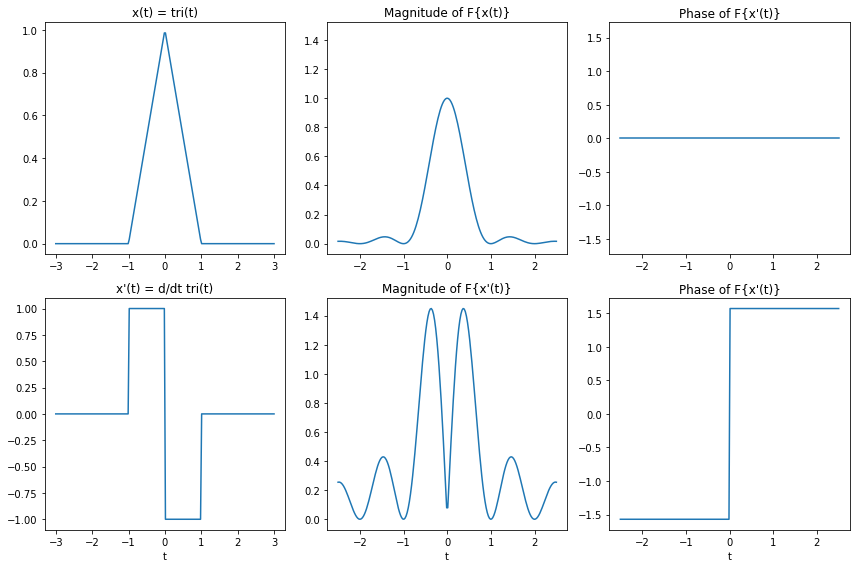

In [15]:
axs = make_axs(2, 3)

T = 1
ts = np.linspace(-3, 3, 200)
fs = np.linspace(-2.5, 2.5, 200)


def x(t):
    return signal.tri(t, T)


def x_p(t):
    return -signal.rect(t - T / 2, T) + signal.rect(t + T / 2, T)


axs[0][0].plot(ts, x(ts))
axs[0][0].set_title(f"x(t) = tri(t)")

axs[1][0].plot(ts, x_p(ts))
axs[1][0].set_title(f"x'(t) = d/dt tri(t)")

f_x = fourier.transform(x, fs)
f_xp = fourier.transform(x_p, fs)
axs[0][1].plot(fs, np.abs(f_x))
axs[0][1].set_title("Magnitude of F{x(t)}")

axs[1][1].plot(fs, np.abs(f_xp))
axs[1][1].set_title("Magnitude of F{x'(t)}")

axs[0][2].plot(fs, np.angle(f_x))
axs[0][2].set_title("Phase of F{x'(t)}")

axs[1][2].plot(fs, np.angle(f_xp))
axs[1][2].set_title("Phase of F{x'(t)}")
plt.tight_layout()
plt.show()

This is equivalent to scaling the magnitude plot by $2\pi |f|$, and shifting the phase plot by $\frac{\pi}{2} \cdot sgn(f)$.

### Integration  in time domain
$$
\int ^ t _{-\infty} x(\tau) d \tau \leftrightharpoons  \frac{1}{j2 \pi f} X(f) + \frac{1}{2} X(0) \delta(f)
$$

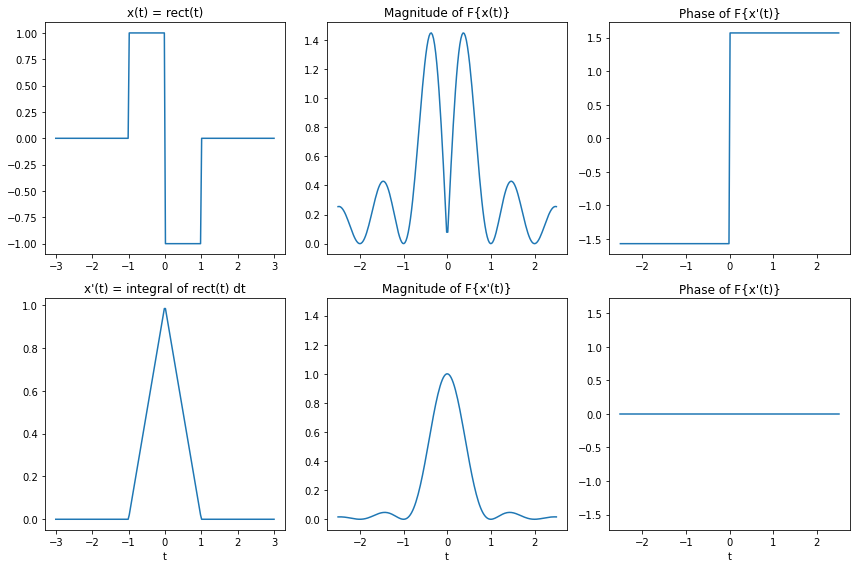

In [16]:
axs = make_axs(2, 3)

T = 1
ts = np.linspace(-3, 3, 200)
fs = np.linspace(-2.5, 2.5, 200)


def x(t):
    return -signal.rect(t - T / 2, T) + signal.rect(t + T / 2, T)


def x_p(t):
    return signal.tri(t, T)


axs[0][0].plot(ts, x(ts))
axs[0][0].set_title(f"x(t) = rect(t)")

axs[1][0].plot(ts, x_p(ts))
axs[1][0].set_title(f"x'(t) = integral of rect(t) dt")

f_x = fourier.transform(x, fs)
f_xp = fourier.transform(x_p, fs)
axs[0][1].plot(fs, np.abs(f_x))
axs[0][1].set_title("Magnitude of F{x(t)}")

axs[1][1].plot(fs, np.abs(f_xp))
axs[1][1].set_title("Magnitude of F{x'(t)}")

axs[0][2].plot(fs, np.angle(f_x))
axs[0][2].set_title("Phase of F{x'(t)}")

axs[1][2].plot(fs, np.angle(f_xp))
axs[1][2].set_title("Phase of F{x'(t)}")
plt.tight_layout()
plt.show()

This is equivalent to scaling the magnitude plot by $\frac{1}{2\pi |f|}$, and shifting the phase plot by $-\frac{\pi}{2} \cdot sgn(f)$.

### Convolution in the time domain
$$
x_1(t) * x_2(t) \leftrightharpoons  X_1(f) X_2(f)
$$

Here, we introduce a new operator ($*$), the **convolution**.

It is defined as:
$$
x_1(t) * x_2(t) = \int ^ \infty _{-\infty} x_1(\zeta) x_2(t - \zeta) d \zeta
$$

In the $\zeta$ graph, since $x_2(t-\zeta)$ is just the $x_2(t)$ graph, but shifted by $t$, convolution is related to the "amount of overlapped area" between the two graphs as we vary the amount of shift in $x_2$.

In [17]:
from scipy.integrate import quad


def convolve(x1, x2, Tp=np.inf):
    return lambda t: quad(lambda z: x1(z) * x2(t - z), -Tp, Tp)[0]

/tmp/ipykernel_190425/13591986.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return lambda t: quad(lambda z: x1(z) * x2(t - z), -Tp, Tp)[0]


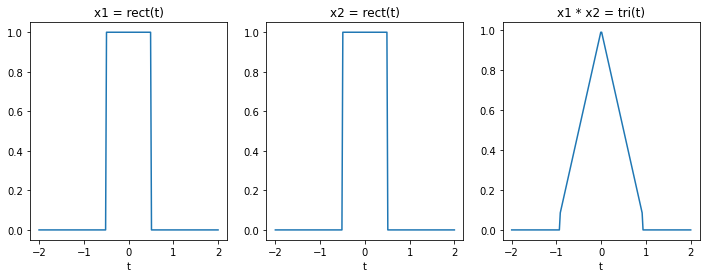

In [18]:
_, axs = plt.subplots(1, 3, figsize=(12, 4))

ts = np.linspace(-2, 2, 200)


def x1(t):
    return signal.rect(t, 1)


def x2(t):
    return signal.rect(t, 1)


c = np.vectorize(convolve(x1, x2))

axs[0].plot(ts, x1(ts))
axs[1].plot(ts, x2(ts))
axs[2].plot(ts, c(ts))

for ax in axs:
    ax.set_xlabel("t")

axs[0].set_title("x1 = rect(t)")
axs[1].set_title("x2 = rect(t)")
axs[2].set_title("x1 * x2 = tri(t)")

plt.show()

Notice that $x(t) = rect(t) * rect(t) = tri(t)$.
And it is also true that $X(f) = \mathcal F \{ tri (t) \} = sinc^2(t) = \mathcal F \{ rect(t) \} \times \mathcal F \{ rect(t) \}$

#### Properties of convolution

##### Commutative

$$
x_1(t) * x_2(t) = x_2(t) * x_1(t)
$$

##### Associative

$$
[x_1(t) * x_2(t)] * x_3(t) = x_1(t) * [x_2(t) * x_3(t)]
$$

##### Distributive

$$
x_1(t) * [x_2(t) + x_3(t)] = x_1(t) * x_2(t)  + x_1(t) * x_3(t)
$$

Once again, it may seem weird that we are interested in such a peculiar function, but it plays a big role in signal processing, in particular in conjunction with the Dirac delta function.

### Multiplication in the time domain
$$
x_1(t) x_2(t) \leftrightharpoons  X_1(f) * X_2(f)
$$

---

Previously, we had to perform tedious integrations to obtain the Fourier transform.
Using these properties, we can derive Fourier transform of functions using Fourier transforms of known functions, skipping the need for integrations.

## Properties of Dirac delta function in Fourier transforms

We were introduced some [basic properties](./introduction.ipynb#Property) of the Dirac delta function.

Now, we will state the properties that it has when applied with Fourier transforms.

### Replication

$$
x(t) * \delta(t-\alpha) = x(t - \alpha)
$$

<details>
    <summary style="color: blue">$\proof$ (Click to expand)</summary>
    <div style="background: aliceblue">
$$
\begin{align}
x(t) * \delta(t-\alpha) &= \int ^\infty _{-\infty} x(\zeta) \delta(t - \zeta - \alpha) d\zeta & \\
& = \int ^\infty _{-\infty} x(\zeta) \delta(-\zeta+ (t - \alpha)  d\zeta & \\
& = \int ^\infty _{-\infty} x(\zeta) \delta(\zeta- (t - \alpha)  d\zeta & \text{By symmetry}\\
& =x(t - \alpha) & \text{By sifting}\\ 
 \end{align}
$$
    </div>
</details>

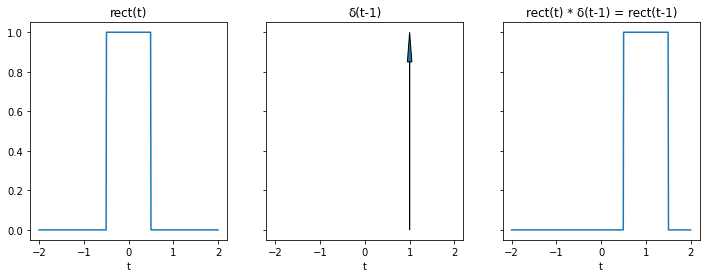

In [19]:
_, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

ts = np.linspace(-2, 2, 500)

axs[0].plot(ts, signal.rect(ts, 1))
axs[1].arrow(1, 0, 0, 1, head_width=0.1, length_includes_head=True)
axs[2].plot(ts, signal.rect(ts - 1, 1))

for ax in axs:
    ax.set_xlabel("t")

axs[0].set_title("rect(t)")
axs[1].set_title("δ(t-1)")
axs[2].set_title("rect(t) * δ(t-1) = rect(t-1)")

plt.show()

This means that when we convolve with the Dirac delta function, the signal simply gets shifted in the time domain.

This is rather useful because we can convolve with the Dirac comb function to create a periodic signal.

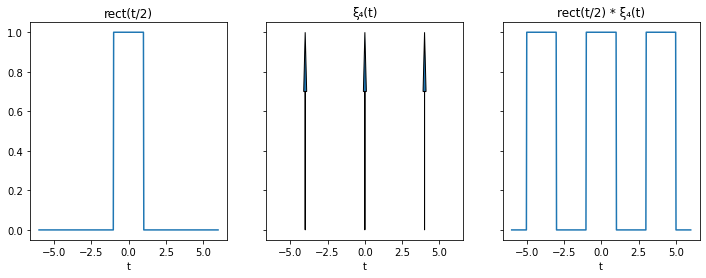

In [20]:
_, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True, sharey=True)

ts = np.linspace(-6, 6, 500)

axs[0].plot(ts, signal.rect(ts, 2))

for x in range(-4, 5, 4):
    axs[1].arrow(x, 0, 0, 1, head_width=0.2, length_includes_head=True)

axs[2].plot(ts, wave._repeat(lambda t: signal.rect(t, 2), ts, 4))

for ax in axs:
    ax.set_xlabel("t")

axs[0].set_title("rect(t/2)")
axs[1].set_title("ξ₄(t)")
axs[2].set_title("rect(t/2) * ξ₄(t)")

plt.show()

## Spectrum of periodic signal

We have previously seen that the Dirac delta function is capable of adapting the Fourier transform to periodic signals.

Recall that when computing the Fourier series of a periodic signal, the plot consist of values at discrete points of the frequency axis.

Hence, for the Fourier transform of the same periodic signal, we would expect a similar looking plot.
This is where the Dirac delta functions becomes handy, as we are able to represent a series of unit impulses which correspond to these values at discrete intervals.

Indeed, the Fourier transform of a periodic signal is simply represented by its Fourier series coefficients:
$$
X_p(f) = \sum c_k \delta\left( f - \frac{k}{T_p} \right)
$$

### Complex exponential
$$
x(t) = Ke^{j 2 \pi f_0 t} \leftrightharpoons K \delta(f - f_0)
$$

## Properties of Fourier transform of real signals

Note that these properties extends to Fourier series coefficients.

### When $x(t)$ is real

* $|X(f)|$ is even
* $\angle X(f)$ is odd

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
<div style="background: aliceblue">
Since $x(t)$ is real, $x(t) = x^*(t)$.
$$
\begin{align}
X(-f) &= \int ^\infty _{-\infty} x(t) e ^{j 2 \pi ft} dt\\
X^*(f) &= \int ^\infty _{-\infty} x^*(t) e ^{j 2 \pi ft} dt\\
&= \int ^\infty _{-\infty} x(t) e ^{j 2 \pi ft} dt\\
&= X(-f)\\
\end{align}
$$
By definition:
$$
X(-f) = |X(-f)| e^{j \angle X(-f)}\\
X^*(f) = |X(f)| e^{-j \angle X(f)}\\
$$
Equating the magnitude and angles, we get:
$$
X(f) = X(-f)\\
\angle X(f) = - \angle X(-f) \\
QED
$$
</div>
</details>

### When $x(t)$ is real and even

* $X(f)$ is real and even

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
<div style="background: aliceblue">
$$
\begin{align}
X(-f) \leftrightharpoons x(-t) = x(t) & \quad \text{By time scaling}\\
\therefore X(-f) = X(f)& \\
\therefore X(f) \text{ is even} &\\
X^*(f) = X(-f) = X(f)&\\
X^*(f) = X(f) \Rightarrow X(f) \text{ is real}& \\
QED&
\end{align}
$$
</div>
</details>

We have seen this in the $rect$ and $tri$ functions.

### When $x(t)$ is real and odd

* $X(f)$ is imaginary and odd

<details>
<summary style="color: blue">$\proof$ (Click to expand)</summary>
<div style="background: aliceblue">
$$
\begin{align}
X(-f) \leftrightharpoons x(-t) = -x(t) & \quad \text{By time scaling}\\
\therefore -X(-f) = X(f)& \\
\therefore X(f) \text{ is odd} &\\
X^*(f) = X(-f) = -X(f)&\\
X^*(f) = -X(f) \Rightarrow X(f) \text{ is imaginary}& \\
QED&
\end{align}
$$
</div>
</details>

We have seen this in the saw-tooth wave.

Since we know that for real signals, $\angle X(f)$ should be odd.
That is why we <em id='convention'>chose to orientate </em> our $\pm \pi$ phases such that the phase plot is odd, even though they represent the same thing.